<a href="https://colab.research.google.com/github/shakeeluetp1041/Machine-Learning/blob/main/MultiClassBlobClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
device='cuda' if torch.cuda.is_available() else 'cpu'
import matplotlib.pyplot as plt
import numpy as np
device
No_of_features=2
No_of_classes=4
X,label=make_blobs(n_samples=1000, n_features=No_of_features, centers=No_of_classes, cluster_std=2, shuffle= True, random_state=42)
label=label.reshape(-1,1)
X=torch.from_numpy(X).type(torch.float32)
label=torch.from_numpy(label).type(torch.LongTensor)

X_train,X_test,y_train,y_test=train_test_split(X,label,test_size=0.2,random_state=42,shuffle=True)
torch.manual_seed(42)
class MultiClassBlobClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(in_features=2,out_features=128);
    # self.relu1=nn.ReLU();
    self.linear2=nn.Linear(in_features=128,out_features=4);
    # self.relu2=nn.ReLU()
  def forward (self,x:torch.Tensor):
    return self.linear2(self.linear1(x)) # For BCELoss()
    # return self.relu2(self.linear2(self.relu1(self.linear1(x)))) # For BCELoss()
torch.manual_seed(42)
model= MultiClassBlobClassification().to(device)
model.state_dict()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

def accuracy_fn(y_true,y_predicted):
  count=torch.eq(y_true,y_predicted).sum().item()
  acc=(count/len(y_true))*100
  return acc
epochs=2000
for epoch in range(epochs):
  model.train()
  y_train_logits=model(X_train.to(device))
  y_train_predicted_probs=torch.softmax(y_train_logits,dim=1)
  y_train_predicted_labels=torch.argmax(y_train_predicted_probs,dim=1).reshape(-1,1)
  train_loss=loss_fn(y_train_logits,y_train.squeeze().to(device))
  train_acc=accuracy_fn(y_true=y_train.to(device),y_predicted=y_train_predicted_labels)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model.eval()

  with torch.inference_mode():
    y_test_logits=model(X_test.to(device))
    y_test_predicted_probs=torch.softmax(y_test_logits,dim=1)
    y_test_predicted_labels=torch.argmax(y_test_predicted_probs,dim=1).reshape(-1,1)
    test_loss=loss_fn(y_test_logits,y_test.squeeze().to(device))
    test_acc=accuracy_fn(y_true=y_test.to(device),y_predicted=y_test_predicted_labels)

  if epoch%500==0:
    print(f"EPOCHS:{epoch} |Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")



EPOCHS:0 |Train Loss: 0.6862 | Test Loss: 1.2998 | Train Acc: 74.5000 | Test Acc: 70.0000
EPOCHS:500 |Train Loss: 0.0923 | Test Loss: 0.0784 | Train Acc: 96.1250 | Test Acc: 97.0000
EPOCHS:1000 |Train Loss: 0.0875 | Test Loss: 0.0727 | Train Acc: 96.3750 | Test Acc: 97.0000
EPOCHS:1500 |Train Loss: 0.0843 | Test Loss: 0.0688 | Train Acc: 96.5000 | Test Acc: 96.5000


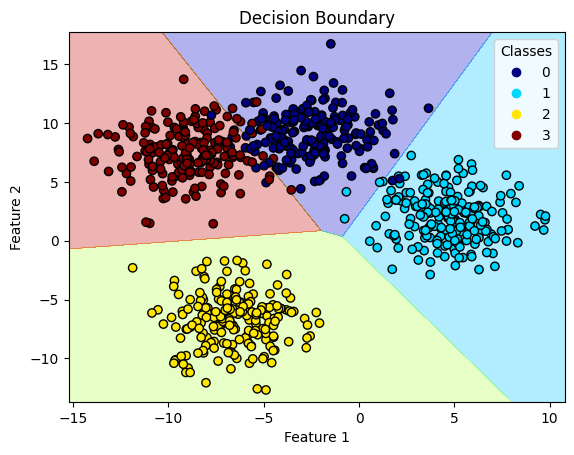

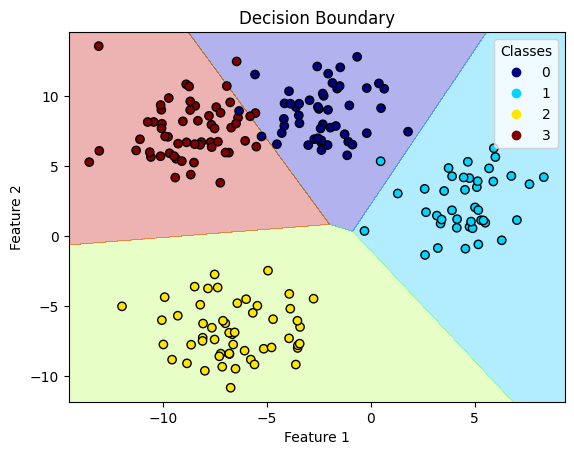

Text(0, 0.5, 'Feature 2')

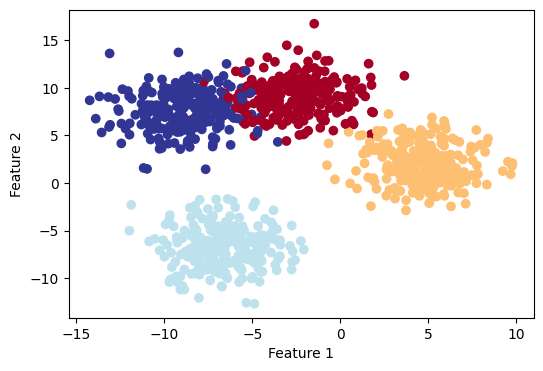

In [ ]:
def plot_decision_boundary(model, X, y, device):
    """
    Plot the decision boundary of a trained model.

    Parameters:
    - model: Trained PyTorch model
    - X: Input features (2D, numpy array)
    - y: True labels for the data (for coloring)
    - device: Device on which the model is loaded (e.g., 'cpu' or 'cuda')
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate a grid of points with a fixed step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Convert grid to tensor and pass it through the model
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(grid_tensor)

    # Convert logits to class predictions
    _, predicted_classes = torch.max(predictions, dim=1)
    Z = predicted_classes.cpu().numpy().reshape(xx.shape)

    # Plot the contour and training examples

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()


plot_decision_boundary(model, X_train, y_train, device)

plot_decision_boundary(model, X_test, y_test, device)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=label,cmap='RdYlBu')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
